In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Telecom-Usage-Details.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


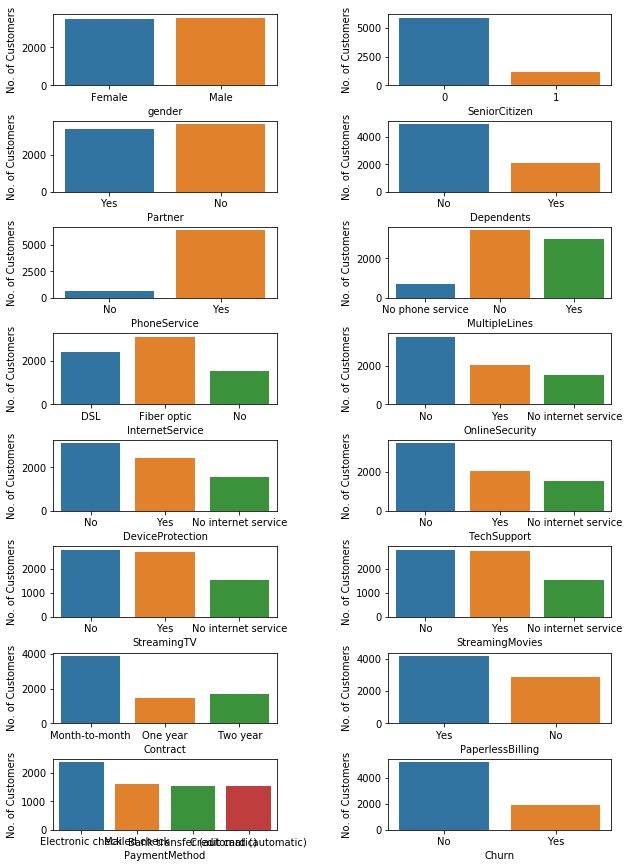

In [4]:
features=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod','Churn']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 0.5, wspace= 0.5)
    sns.countplot(x = j, data = data)
    plt.ylabel('No. of Customers')
    plt.xlabel(j.replace("_",' '))

- A minority of the sample are senior citizens, and have dependents.
- Most of the sample have phone service with a single phone line. 
- Fiber optic internet connection is more popular than DSL internet service.
- Most of the sample are on paperless billing, and pay by electronic check.
- half of the sample are on month-to-month contracts with the remaining split between one and two year contracts.


In [ ]:
sns.distplot(data['TotalCharges'], hist = True ,bins=int(180/5),color='green',kde=False)
plt.title('Total Chharges')
plt.xlabel('Dollars')
plt.ylabel('Counts')


- The TotalCharges variable is skewed near the lower amounts.

Text(0, 0.5, 'Counts')

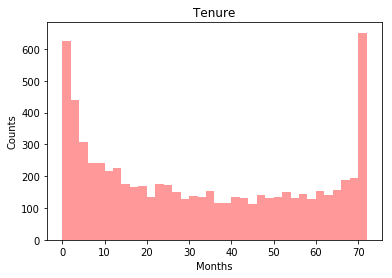

In [7]:
sns.distplot(data['tenure'], hist = True ,bins=int(180/5),color='red' ,kde=False)
plt.title('Tenure')
plt.xlabel('Months')
plt.ylabel('Counts')

- The tenure is stacked at the tails, so a large proportin of customers have either been had the shortest (1 month) or longest nearly (72 month) tenure. 

Text(0, 0.5, 'Counts')

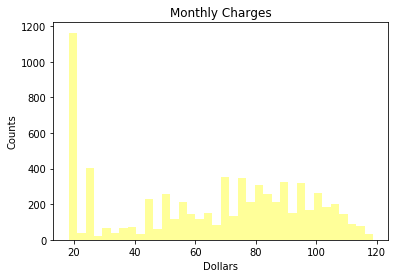

In [8]:
sns.distplot(data['MonthlyCharges'], hist = True ,bins=int(180/5),color='yellow' ,kde=False)
plt.title('Monthly Charges')
plt.xlabel('Dollars')
plt.ylabel('Counts')

### **Import the sklearn Labels Encoder**
# Data Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [6]:
new_data = data.drop(['TotalCharges', 'MonthlyCharges', 'customerID'], axis=1)

In [7]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [8]:
for col in new_data:
    new_data[col]=le.fit_transform(new_data[col])
    set(new_data[col].unique())

In [9]:
new_data['MonthlyCharges'] = data.MonthlyCharges
new_data['TotalCharges'] = data.TotalCharges


In [17]:
#new_data.head

# KMeans Clustring

In [10]:
from sklearn.cluster import KMeans

In [11]:
left_customer =  data[['tenure', 'TotalCharges']][data.Churn == 'Yes']
left_customer.head()

,tenure,TotalCharges
2,2,108.15
4,2,151.65
5,8,820.5
8,28,3046.05
13,49,5036.3


In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_customer)

In [13]:
set(kmeans.labels_)

{0, 1, 2}

In [14]:
left_customer['label'] = kmeans.labels_
left_customer.head()

,tenure,TotalCharges,label
2,2,108.15,0
4,2,151.65,0
5,8,820.5,0
8,28,3046.05,1
13,49,5036.3,2


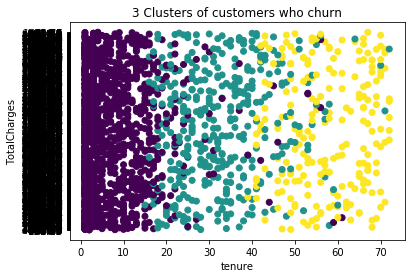

In [15]:
plt.scatter(left_customer['tenure'], left_customer['TotalCharges'], c=left_customer['label'])
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('3 Clusters of customers who churn')
plt.show()

### **Here, Customers who may churn can be grouped into 3 type of employees:**

- <h4 style='color:#cccc00;'>High Tenure and High TotalCharges, you can also call them not churn.</h4>
- <h4 style='color:green'>Moderate Tenure and moderate TotalCharges, you can also call them 'Bad match'.</h4>
- <h4 style='color:purple;'> Low Tenure and low TotalCharges you can also call them Churn.</h4>


# Building the Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
X=new_data.drop(['Churn'], axis=1)
y=new_data['Churn']

# Building 3 models using Logistic Regression, in each model we select the data randomly.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.8050165641268339
Precision: 0.66875
Recall: 0.5592334494773519


C:\Users\win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,shuffle = True,  test_size=0.3, random_state=10)
clf2 = LogisticRegression(random_state=0).fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test)
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Precision:", precision_score(y_test2, y_pred2))
print("Recall:", recall_score(y_test2, y_pred2))

Accuracy: 0.6346426881211548
Precision: 0.2845691382765531
Recall: 0.25493716337522443


C:\Users\win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y,shuffle = True,  test_size=0.3, random_state=22) 
clf3 = LogisticRegression(random_state=0).fit(X_train3, y_train3)
y_pred3 = clf3.predict(X_test3)
print("Accuracy:", accuracy_score(y_test3, y_pred3))
print("Precision:", precision_score(y_test3, y_pred3))
print("Recall:", recall_score(y_test3, y_pred3))

Accuracy: 0.7898722195929957
Precision: 0.6461864406779662
Recall: 0.5240549828178694


C:\Users\win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    #plt.show()

In [60]:
auc1 = roc_auc_score(y_test, y_pred)
auc2 = roc_auc_score(y_test2, y_pred2)
auc3 = roc_auc_score(y_test3, y_pred3)
print('AUC1: %.2f' % auc1)
print('AUC2: %.2f' % auc2)
print('AUC3: %.2f' % auc3)

AUC1: 0.73
AUC2: 0.51
AUC3: 0.71


In [61]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds = roc_curve(y_test2, y_pred2)
fpr3, tpr3, thresholds = roc_curve(y_test3, y_pred3)

AUC1: 0.73


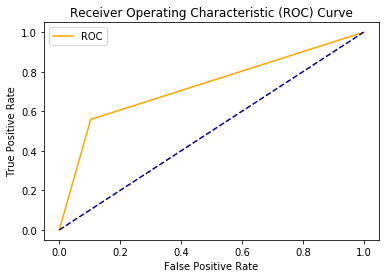

In [69]:
plot_roc_curve(fpr1, tpr1)
print('AUC1: %.2f' % auc1)


- The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Here The AUC is 0.7 (not bad and not ideal but still better)

AUC2: 0.51


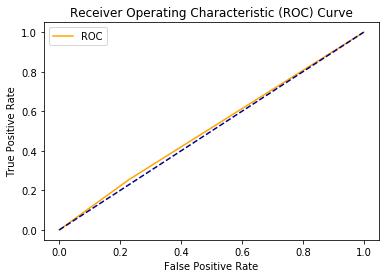

In [67]:
plot_roc_curve(fpr2, tpr2)
print('AUC2: %.2f' % auc2)

- In the event where both the class distribution simply mimic each other, AUC is 0.5. In other words, our model is 50% accurate for instances and their classification. The model has no discrimination capabilities at all in this case.

AUC3: 0.71


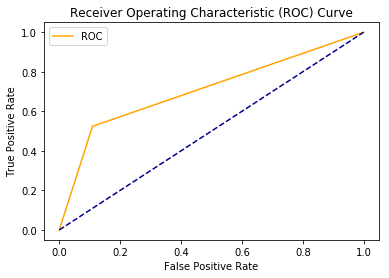

In [86]:
plot_roc_curve(fpr3, tpr3)
print('AUC3: %.2f' % auc3)

# The 3 curves

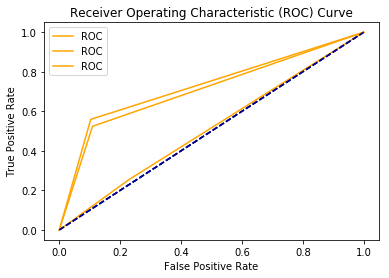

In [68]:
plot_roc_curve(fpr1, tpr1)

plot_roc_curve(fpr2, tpr2)

plot_roc_curve(fpr3, tpr3)

plt.show()

- we can conclude that the logistic regression has the false negative rate is low while not as quite as low. In contrast, the false positive rate is high ,therefore performing better with max accuracy of 81%.

# References that helped me 
https://stackabuse.com/understanding-roc-curves-with-python/
http://rstudio-pubs-static.s3.amazonaws.com/443094_bc2c15d74e7e4b7b96d8fc95f3162b08.html